<a href="https://colab.research.google.com/github/mayurraj9378/Data-Science/blob/main/tweets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
pip install pandas numpy scikit-learn nltk seaborn matplotlib


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

# Load dataset
df = pd.read_csv("data.csv")

print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                    id      conversation_id               created_at  \
0  1406397735792791556  1406397735792791556  2021-06-20 05:15:24 IST   
1  1406057066058313733  1406057066058313733  2021-06-19 06:41:42 IST   
2  1405965100993986561  1405965100993986561  2021-06-19 00:36:16 IST   
3  1405935463374991366  1405935461042958338  2021-06-18 22:38:30 IST   
4  1405918849329991694  1405918849329991694  2021-06-18 21:32:29 IST   

         date      time  timezone     user_id      username  \
0  2021-06-20  05:15:24       530    16001827    spj_tweets   
1  2021-06-19  06:41:42       530  1067308099  coastguardph   
2  2021-06-19  00:36:16       530   167406704     yaelkohen   
3  2021-06-18  22:38:30       530    29206490       ieeeusa   
4  2021-06-18  21:32:29       530    31696962     dw_europe   

                                  name place  ... geo source user_rt_id  \
0  Society of Professional Journalists   NaN  ... NaN    NaN        NaN   
1               Philippine Coast Guard

<ipython-input-34-59aa1cdc9802>:16: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


In [35]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove @ and #
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuations
    text = text.lower()  # lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['cleaned_text'] = df['tweet'].apply(clean_text)


In [36]:
positive_keywords = ['good', 'great', 'excellent', 'love', 'best', 'happy']
negative_keywords = ['bad', 'worst', 'hate', 'problem', 'sad', 'issue']

def label_tweet(text):
    for word in positive_keywords:
        if word in text:
            return 1
    for word in negative_keywords:
        if word in text:
            return 0
    return -1  # neutral or unclear

df['label'] = df['cleaned_text'].apply(label_tweet)
df = df[df['label'] != -1]  # remove neutral/unclear tweets


In [37]:
X = df['cleaned_text']
y = df['label']

# Convert text to numerical data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [38]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79       218
           1       0.90      0.98      0.94       608

    accuracy                           0.90       826
   macro avg       0.91      0.83      0.86       826
weighted avg       0.90      0.90      0.90       826

Confusion Matrix:
 [[151  67]
 [ 14 594]]


In [39]:
# Count of positive and negative tweets
print(df['label'].value_counts())


label
1    3024
0    1104
Name: count, dtype: int64


In [40]:
print("Tweet Sentiment Counts:")
print(df['label'].value_counts().rename(index={1: 'Positive', 0: 'Negative'}))


Tweet Sentiment Counts:
label
Positive    3024
Negative    1104
Name: count, dtype: int64


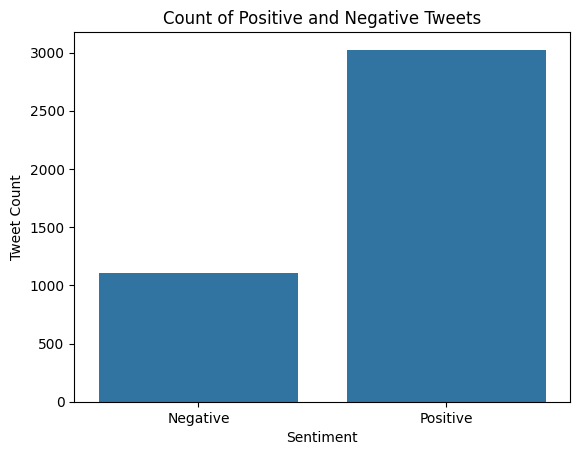

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Count of Positive and Negative Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


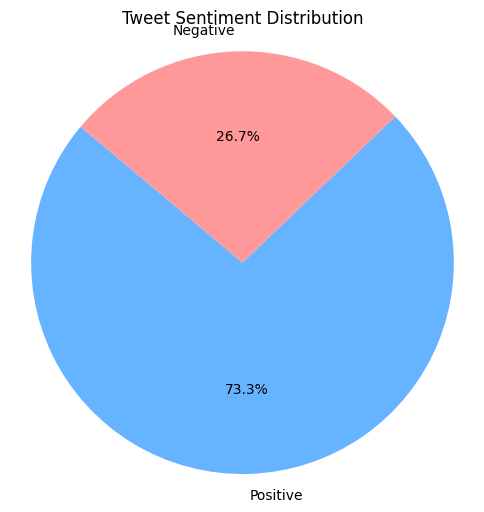

In [42]:
import matplotlib.pyplot as plt

# Count labels
label_counts = df['label'].value_counts()

# Define labels
labels = ['Positive', 'Negative']
sizes = [label_counts[1], label_counts[0]]
colors = ['#66b3ff', '#ff9999']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Tweet Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.show()
